In [1]:
import load_data_v1 as ld
import find_segmentation_zone as fsz
from matplotlib import pyplot as plt


In [2]:
root_folder = r'E:\Juyue\Kaggle_Data\sample\sample\subject_1'
data = ld.load_data_for_one_subject(root_folder)


FilePosition 512
FilePosition 512


In [3]:
zone_combine_list = fsz.find_segmentation_zone_main(data)

C:\ProgramData\Anaconda3\envs\tensorflow_kaggle_clone\lib\site-packages\skimage\morphology\misc.py:122: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
  warn("Only one label was provided to `remove_small_objects`. "


In [6]:
zone_combine_list[0].shape


(660, 512, 17)

In [4]:
# def image_segmentation_plot_utils_find_range(mask):
#     from find_segmentation_line import find_matlab_style
#     ver_start_list = []
#     ver_end_list = []
#     for ii in range(mask.shape[1]):
#         ver_start_list = ver_start_list + find_matlab_style(mask[:,ii], n = 1, mode = 'first')
#         ver_end_list = ver_end_list + find_matlab_style(mask[:,ii], n = 1, mode = 'last')
#     ver_start = np.min(ver_start_list)
#     ver_end = np.max(ver_end_list)

#     hor_start_list = []
#     hor_end_list = []
#     for ii in range(mask.shape[0]):
#         hor_start_list = hor_start_list + find_matlab_style(mask[ii,:], n = 1, mode = 'first')
#         hor_end_list = hor_end_list + find_matlab_style(mask[ii,:], n = 1, mode = 'last')
#     hor_start = np.min(hor_start_list)
#     hor_end = np.max(hor_end_list)
    
#     return ver_start, ver_end, hor_start, hor_end 

In [50]:
def image_segmentation_cut_one_zone_from_one_image(image, image_zone_mask_not, plot_flag = False):
    
    from skimage.filters import threshold_otsu
    from skimage import morphology
    import scipy.ndimage as nd

    image_zone = cp.copy(image)
    image_zone[image_zone_mask_not] = 0

    thresh = threshold_otsu(image_zone)
    binary = image_zone > thresh
    I_mask_image_zone = morphology.remove_small_objects(binary, min_size = 64, connectivity= 2)

    I_change = cp.copy(I_mask_image_zone)
    dilation_size = 20
    struct = np.ones([dilation_size, dilation_size])
    I_change = nd.binary_dilation(I_change, struct)
    I_change = nd.binary_erosion(I_change, struct)

    ## find upper,top, lef, height and width.
    ver_start, ver_end, hor_start, hor_end = fsz.image_segmentation_plot_utils_find_range(I_change)

    ## cut the spefici region.
    image_zone_final = image_zone[ver_start:ver_end, hor_start: hor_end]

    if plot_flag:
        fig, axes = plt.subplots(1,5,figsize=(15,15))
        ax = axes.ravel()
        ax[0].imshow(image)
        ax[1].imshow(image_zone)
        ax[2].imshow(I_mask_image_zone)
        ax[3].imshow(I_change)
        ax[4].imshow(image_zone_final)

        plt.show()
    
    return image_zone_final
def image_segmentation_image_zone_resize(image_zone, zone_num, target_size = (150, 150)):
    import copy as cp
    from skimage.transform import resize
#     if zone_num == 2:
#         image = cp.copy(image_zone[: ,0: target_size[1]])
#     elif zone_num == 4:
#         nx, ny = image_zone.shape
#         image = cp.copy(image_zone[:, ny - target_size[1]: ny])
#     else:
#         image = cp.copy(image_zone)
    
    image_resized = resize(image_zone, target_size)
    return image_resized
def image_segmentation_one_I_to_zone(image, zone_mask):
    n_zone = zone_mask.shape[2]
    image_zone_list = [None for ii in range(17)]
    for zz in range(17):
        zone_mask_this = zone_mask[:,:,zz]
        if np.sum( zone_mask_this) > 0:
            image_zone_mask_not = np.array( zone_mask_this != True)
            image_zone_original = image_segmentation_cut_one_zone_from_one_image(image, image_zone_mask_not, plot_flag = False)
            image_resize = image_segmentation_image_zone_resize(image_zone_original, zz + 1, target_size = (150, 150))
            image_zone_list[zz] = image_resize
    return image_zone_list
def image_segmentation_data_to_zone(data, zone_mask_list):
    import copy as cp
    import numpy as np
    n_views = data['.a3daps'].shape[2]
    image_zone_list_all = [None for ii in range(n_views)]
    for ii in range(n_views):
        image = cp.copy(np.flipud(data['.a3daps'][:,:,ii].transpose()))
        image_zone_list_all[ii] = image_segmentation_I_to_zone(image, zone_mask_list[ii])
    return image_zone_list_all

In [51]:
image_zone_list_all = image_segmentation_data_to_zone(data, zone_combine_list)
    

C:\ProgramData\Anaconda3\envs\tensorflow_kaggle_clone\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\ProgramData\Anaconda3\envs\tensorflow_kaggle_clone\lib\site-packages\skimage\morphology\misc.py:122: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
  warn("Only one label was provided to `remove_small_objects`. "


In [69]:
image_zone_list_all[1][0][0,1]

0.025428415190429484

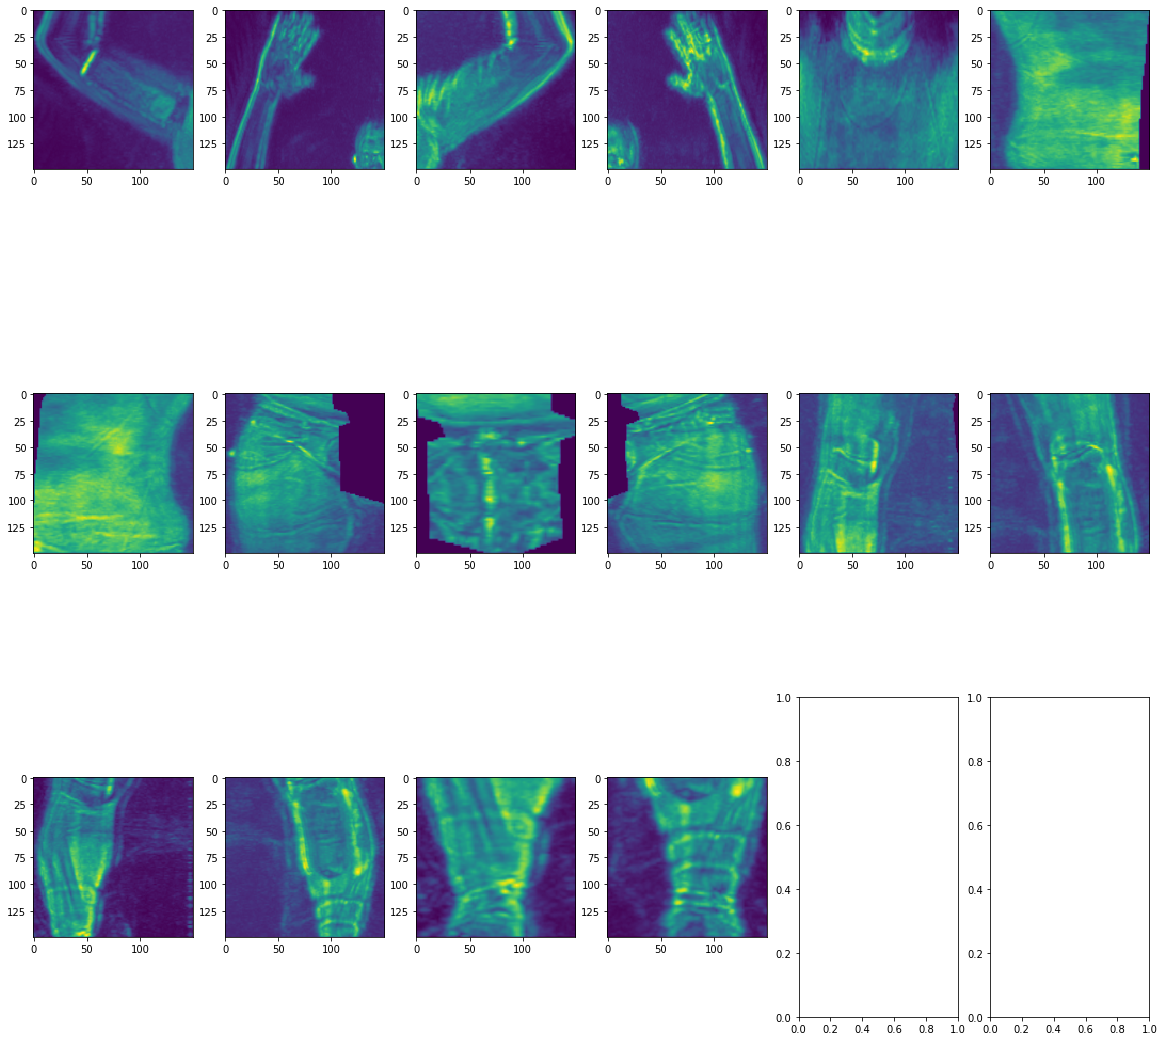

In [72]:
ii = 1
fig, axes = plt.subplots(3, 6, figsize = (20, 20))
ax = axes.ravel()
for jj in range(17):
    if image_zone_list_all[ii][jj] is not None:
        ax[jj].imshow(image_zone_list_all[ii][jj])

plt.show()    

In [ ]:
# given figures, how could you make them into the same shape?
